###installing gensim lib

In [6]:

# !pip install gensim

In [7]:
from gensim.models import Word2Vec

In [8]:
sentence =  [
    "the quick brown fox jumps over the lazy dog.",
    "I like eating apples and bananas.",
    "Natural language processing is a fascinating field."
]

In [9]:
from nltk.tokenize import word_tokenize

In [10]:
final_data =[]
for sent in sentence:
    final_data.append(word_tokenize(sent))

In [11]:
final_data

[['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.'],
 ['I', 'like', 'eating', 'apples', 'and', 'bananas', '.'],
 ['Natural', 'language', 'processing', 'is', 'a', 'fascinating', 'field', '.']]

In [12]:
##create the object 
model  = Word2Vec(final_data,min_count=1,vector_size=10)


In [13]:
##
model.wv

In [14]:
model.wv['apples']

array([ 0.0996485 , -0.04362444, -0.00599338, -0.05695637,  0.03850823,
        0.02786627,  0.06891076,  0.06101096,  0.09538497,  0.09273417],
      dtype=float32)

In [15]:
model.wv['bananas']

array([ 0.07817571, -0.09510187, -0.00205531,  0.03469197, -0.00938972,
        0.08381772,  0.09010784,  0.06536506, -0.00711621,  0.07710405],
      dtype=float32)

In [16]:
# help(Word2Vec)

In [17]:
def get_embedding(word):
    try:
        word_embedding =  model.wv[word]
        print(f"word embedding for '{word}':{word_embedding}")
    except KeyError:
        print(f"Word'{word}'not found in the vocabulary")


In [18]:
get_embedding("apples")

word embedding for 'apples':[ 0.0996485  -0.04362444 -0.00599338 -0.05695637  0.03850823  0.02786627
  0.06891076  0.06101096  0.09538497  0.09273417]


In [19]:
get_embedding("fox")

word embedding for 'fox':[-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]


In [20]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(model.wv['apples'].reshape(1,-1),
                  model.wv['bananas'].reshape(1,-1))

array([[0.6702956]], dtype=float32)

In [21]:

cosine_similarity(model.wv['fox'].reshape(1,-1),
                  model.wv['dog'].reshape(1,-1))

array([[0.29141334]], dtype=float32)

In [22]:
import nltk
nltk.download('abc')

[nltk_data] Downloading package abc to C:\Users\Administrator.DAI-
[nltk_data]     PC2\AppData\Roaming\nltk_data...
[nltk_data]   Package abc is already up-to-date!


True

In [23]:
from nltk.corpus import abc

In [24]:
sents  =  abc.sents()

In [25]:
sents

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ...]

In [26]:
len(sents)

29059

In [27]:
##create the objects 
model = Word2Vec(sents,min_count=1,vector_size=10)

In [28]:
model.wv.key_to_index

{'the': 0,
 '.': 1,
 ',': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'a': 6,
 'in': 7,
 "'": 8,
 'is': 9,
 'says': 10,
 '"': 11,
 'that': 12,
 's': 13,
 'for': 14,
 'The': 15,
 '-': 16,
 'are': 17,
 'it': 18,
 'be': 19,
 'have': 20,
 ',"': 21,
 'on': 22,
 'from': 23,
 'with': 24,
 'has': 25,
 'at': 26,
 'he': 27,
 'as': 28,
 'will': 29,
 'they': 30,
 'by': 31,
 'not': 32,
 'said': 33,
 'been': 34,
 'we': 35,
 'this': 36,
 'an': 37,
 'more': 38,
 'Australia': 39,
 'their': 40,
 'was': 41,
 'or': 42,
 'which': 43,
 'can': 44,
 'about': 45,
 'up': 46,
 'there': 47,
 'but': 48,
 'than': 49,
 'could': 50,
 'But': 51,
 'Australian': 52,
 '."': 53,
 'new': 54,
 'were': 55,
 'also': 56,
 'one': 57,
 't': 58,
 'out': 59,
 'years': 60,
 'I': 61,
 'say': 62,
 'its': 63,
 'It': 64,
 'year': 65,
 'people': 66,
 'would': 67,
 'water': 68,
 'into': 69,
 'some': 70,
 'other': 71,
 'had': 72,
 'you': 73,
 'who': 74,
 'found': 75,
 'A': 76,
 'like': 77,
 'We': 78,
 'over': 79,
 'may': 80,
 'so': 81,
 'researche

In [29]:
len(model.wv.key_to_index)

31885

In [30]:
data  = model.wv.most_similar('science')
data

[('authority', 0.9828738570213318),
 ('capitalise', 0.9744533896446228),
 ('Dubbo', 0.9721260666847229),
 ('arousal', 0.9707500338554382),
 ('Hofmann', 0.9700108170509338),
 ('leading', 0.9696871638298035),
 ('Women', 0.9654240608215332),
 ('nurse', 0.9648520946502686),
 ('bulk', 0.964234471321106),
 ('publisher', 0.9624302387237549)]

In [31]:
data  = model.wv.most_similar('publisher')
data

[('science', 0.9624302387237549),
 ('Dubbo', 0.9572178721427917),
 ('slash', 0.9568673968315125),
 ('earth', 0.9562473297119141),
 ('eliminating', 0.9548392295837402),
 ('tanning', 0.9548380970954895),
 ('Parkinson', 0.9512481093406677),
 ('glands', 0.9511700868606567),
 ('capitalise', 0.9488840699195862),
 ('triple', 0.9484595060348511)]

In [32]:
model.wv['science'],model.wv['publisher']

(array([ 0.14054011,  0.14196147,  2.3050604 ,  0.05377752, -0.36481228,
        -0.6091805 ,  1.7275887 ,  1.124158  , -1.3808237 , -0.40418044],
       dtype=float32),
 array([-0.000414  , -0.01227961,  0.2171648 ,  0.0254871 , -0.08143228,
        -0.07374913,  0.160111  ,  0.0475006 , -0.16122958, -0.06147183],
       dtype=float32))

# Reading the data and training the Word2Vec

In [33]:
import pandas as pd
# df = pd.read_json('intents.json')
# df

In [34]:
import json
with open ('intents.json','r') as f:
    data  = json.load(f)

In [35]:
type(data)

list

In [36]:
data

[{'tag': 'welcome',
  'patterns': ['Hi',
   'How are you',
   'Is any one to talk?',
   'Hello',
   'hi are you available'],
  'responses': ['Hello, thanks for contacting us',
   'Good to see you here',
   ' Hi there, how may I assist you?']},
 {'tag': 'goodbye',
  'patterns': ['Bye', 'See you later', 'Goodbye', 'I will come back soon'],
  'responses': ['See you later, thanks for visiting',
   'have a great day ahead',
   'Wish you Come back again soon.']},
 {'tag': 'thankful',
  'patterns': ['Thanks for helping me',
   'Thank your guidance',
   "That's helpful and kind from you"],
  'responses': ['Happy to help!',
   'Any time!',
   'My pleasure',
   'It is my duty to help you']},
 {'tag': 'hoursopening',
  'patterns': ['What hours are you open?',
   'Tell your opening time?',
   'When are you open?',
   'Just your timing please'],
  'responses': ["We're open every day 8am-7pm",
   'Our office hours are 8am-7pm every day',
   'We open office at 8 am and close at 7 pm']},
 {'tag': 'pay

In [37]:
data[0]['patterns']

['Hi', 'How are you', 'Is any one to talk?', 'Hello', 'hi are you available']

In [38]:
data[0]['responses']

['Hello, thanks for contacting us',
 'Good to see you here',
 ' Hi there, how may I assist you?']

In [39]:
df =  pd.DataFrame(data)

In [40]:
df 

,tag,patterns,responses
0,welcome,"[Hi, How are you, Is any one to talk?, Hello, ...","[Hello, thanks for contacting us, Good to see ..."
1,goodbye,"[Bye, See you later, Goodbye, I will come back...","[See you later, thanks for visiting, have a gr..."
2,thankful,"[Thanks for helping me, Thank your guidance, T...","[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,"[What hours are you open?, Tell your opening t...","[We're open every day 8am-7pm, Our office hour..."
4,payments,"[Can I pay using credit card?, Can I pay usin...","[We accept VISA, Mastercard and credit card, W..."


In [41]:
df['patterns'][3]

['What hours are you open?',
 'Tell your opening time?',
 'When are you open?',
 'Just your timing please']

In [42]:
df['patterns'] =  df['patterns'].apply(', '.join)

In [43]:
df['patterns'][3]

'What hours are you open?, Tell your opening time?, When are you open?, Just your timing please'

In [44]:
from nltk.corpus import stopwords
from textblob import Word
from nltk.tokenize import word_tokenize
import string

In [45]:

stop = stopwords.words('english')
df['patterns']= df['patterns'].apply(
    lambda x:' '.join(x.lower() for x in word_tokenize(x)))
df['patterns'] =  df['patterns'].apply(
    lambda x : ' '.join( x for x in word_tokenize(x) if x  not in string.punctuation))

df['patterns'] =  df['patterns'].str.replace('[^\w\s]', '')
df['patterns'] = df['patterns'].apply(
    lambda x : ' '.join(x for x in word_tokenize(x) if not x.isdigit()))

df['patterns'] = df['patterns'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop))

df['patterns'] = df['patterns'].apply(
    lambda x : " ".join(Word(word).lemmatize(pos='v') for word in word_tokenize(x)))

C:\Users\Administrator.DAI-PC2\AppData\Local\Temp\ipykernel_36640\1321014708.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['patterns'] =  df['patterns'].str.replace('[^\w\s]', '')


In [46]:
df

,tag,patterns,responses
0,welcome,hi one talk hello hi available,"[Hello, thanks for contacting us, Good to see ..."
1,goodbye,bye see later goodbye come back soon,"[See you later, thanks for visiting, have a gr..."
2,thankful,thank help thank guidance helpful kind,"[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,hours open tell open time open time please,"[We're open every day 8am-7pm, Our office hour..."
4,payments,pay use credit card pay use mastercard pay use...,"[We accept VISA, Mastercard and credit card, W..."


In [47]:
w = Word('palying')

In [48]:
w.lemmatize()

'palying'

In [49]:
# Taking the outler list
bigger_list = []
for i in df['patterns']:
    li = i.split()
    bigger_list.append(li)

In [50]:
bigger_list

[['hi', 'one', 'talk', 'hello', 'hi', 'available'],
 ['bye', 'see', 'later', 'goodbye', 'come', 'back', 'soon'],
 ['thank', 'help', 'thank', 'guidance', 'helpful', 'kind'],
 ['hours', 'open', 'tell', 'open', 'time', 'open', 'time', 'please'],
 ['pay',
  'use',
  'credit',
  'card',
  'pay',
  'use',
  'mastercard',
  'pay',
  'use',
  'cash']]

In [51]:
# custtom data is fed to machine for further proced=ssing
model = Word2Vec(bigger_list, min_count=1, vector_size=2)
print(model)

Word2Vec<vocab=28, vector_size=2, alpha=0.025>


In [52]:
model.wv['hi']

array([0.3229368 , 0.44868633], dtype=float32)

In [53]:
model.wv['hello']

array([-0.41426075, -0.4724409 ], dtype=float32)

In [55]:
#model.wv['hour']

In [56]:
model.wv.key_to_index.keys()

dict_keys(['use', 'pay', 'open', 'hi', 'time', 'thank', 'back', 'one', 'talk', 'hello', 'available', 'bye', 'see', 'later', 'goodbye', 'come', 'cash', 'soon', 'mastercard', 'guidance', 'helpful', 'kind', 'hours', 'tell', 'please', 'credit', 'card', 'help'])

In [57]:
import pandas as pd

In [98]:
words = model.wv.key_to_index.keys()
lst = list(words)
data = dict()
for i in range(len(lst)):
     data[lst[i]]= model.wv[lst[i]]


In [99]:
data = pd.DataFrame(data)

In [100]:
data

,use,pay,open,hi,time,thank,back,one,talk,hello,...,mastercard,guidance,helpful,kind,hours,tell,please,credit,card,help
0,-0.026752,0.255238,-0.465147,0.322937,-0.250771,0.369025,-0.226846,-0.242998,0.143829,-0.414261,...,0.403873,0.002235,-0.480178,-0.437980,-0.001755,-0.383062,0.249103,-0.407923,-0.206812,0.424931
1,0.012281,0.450606,-0.355840,0.448686,-0.188169,-0.076674,0.327763,-0.090778,0.049594,-0.472441,...,-0.296459,-0.237638,0.250365,-0.219556,-0.014809,0.480737,0.461657,0.225029,0.041463,-0.223109


In [95]:
#data = data.T

In [103]:
DATA  = data.T.reset_index(names=['Key'])


In [104]:
DATA.head(5)

,Key,0,1
0,use,-0.026752,0.012281
1,pay,0.255238,0.450606
2,open,-0.465147,-0.355840
3,hi,0.322937,0.448686
4,time,-0.250771,-0.188169


In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

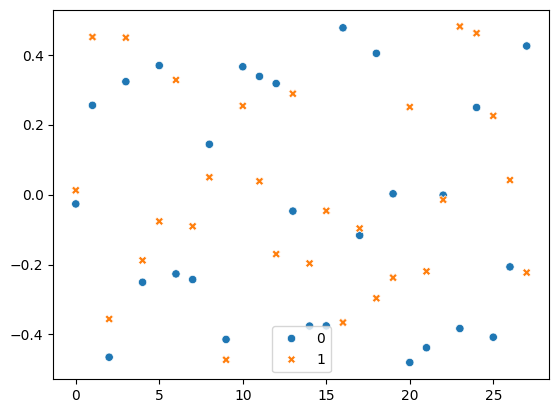

In [106]:
sns.scatterplot(DATA)

In [109]:
# Solve by Sir
words = model.wv.key_to_index.keys()
words = list(words)
VECTOR = []
for word in words:
     vect =model.wv[word]
     VECTOR.append(list(vect))


In [110]:
vectors = pd.DataFrame(VECTOR, columns=['x', 'y'])

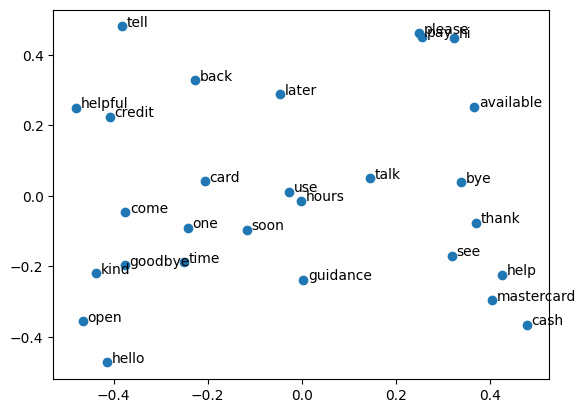

In [111]:
plt.scatter(vectors['x'], vectors['y'])
for i in range(len(words)):
    plt.annotate(xy=(vectors.loc[i,'x']+0.01, vectors.loc[i, 'y']), text = words[i])

In [112]:
model.wv.most_similar('help', topn=5)

[('see', 0.9999620318412781),
 ('mastercard', 0.988812267780304),
 ('cash', 0.9854090809822083),
 ('thank', 0.9614343643188477),
 ('bye', 0.8276455402374268)]

In [113]:
dissimilar_words = model.wv.doesnt_match(
    '''see you later, thanks for visiting'''.split())

print(dissimilar_words)

see
